# Team Members:

Jetendra Mulinti, Goutham Vemula, Prajeeth Nakka

# Introduction: We are building a model, which predicts whether the customer buys a new product or not by using atleast 3 bionomial logistic regressions.

Steps we are following
1. Loading data
2. Cleaning data
3. EDA
4. Feature selection
5. Train the model with 6 Models
6. Validating Metrics.
7. Selecting Models
8. Conclusion

In [177]:
### Import packages

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import os
from datetime import datetime



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Data Loading

In [178]:
github_url = 'https://raw.githubusercontent.com/JetendraMulinti/DAV-6150---DataScience/main/M7%20Practical%20Challenge%20Binary%20Logistic%20Regression/M7_Data.csv'

df = pd.read_csv(github_url)
df.head(2)

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39


## Data Dictionary

TARGET: Indicator of buying the new product (0 = no, 1= yes)

loyalty: Loyalty level, from low to high (0 to 3), 99 = unclassified

ID: Unique customer identifier

age: Age in years

city: Unique code per city

LOR: Length of relationship in years

prod_A: Bought product A (0= no, 1=yes)

type_A: Type of product A

type_B: Type of product B

prod_B: Bought product B (0= no, 1=yes)

turnover_A: Amount of money spent on product A

turnover_B: Amount of money spent on product B

contract: Type of contract

age_P: Age of partner in years

lor_M: Length of relationship in months

In [179]:
df.columns

Index(['TARGET', 'loyalty', 'ID', 'age', 'city', 'LOR', 'prod_A', 'type_A',
       'type_B', 'prod_B', 'turnover_A', 'turnover_B', 'contract', 'age_P',
       'lor_M'],
      dtype='object')

## Data cleaning

In [180]:
df.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

In [181]:
### check duplicates

print("No of rows duplicates: ",len(df[df.duplicated()]))

## dropping

df = df.drop_duplicates().reset_index(drop=True)
df.head(2)

print("No of rows duplicates: ",len(df[df.duplicated()]))

No of rows duplicates:  3008
No of rows duplicates:  0


In [182]:
df['TARGET'].value_counts()

N    8000
Y    3008
Name: TARGET, dtype: int64

In [183]:
#### Changing the Target column values to 0 & 1

df['TARGET'] = df['TARGET'].replace('N',0)
df['TARGET'] = df['TARGET'].replace('Y',1)

df['TARGET'].value_counts()

0    8000
1    3008
Name: TARGET, dtype: int64

In [184]:
df['TARGET'].value_counts()

0    8000
1    3008
Name: TARGET, dtype: int64

In [185]:
len(df[df['city'] <= 0]), len(df[df['city'] >= 0])

(28, 11000)

In [186]:
df.describe()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.0,11008.000000,11008.000000
mean,0.273256,46.533612,27023.459938,34.845203,-724.143078,0.982649,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,2.0,34.845203,14.791788
std,0.445651,48.292402,38576.841141,13.032781,26949.664365,0.939415,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,0.0,13.032781,11.272981
min,0.000000,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,0.000000,2.000000,5480.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,2.0,24.000000,3.000000
50%,0.000000,3.000000,11025.500000,31.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,2.0,31.000000,15.000000
75%,1.000000,99.000000,16632.250000,42.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,2.0,42.000000,15.000000
max,1.000000,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


### points to check

1. age_P min value is 5
2. planning to remove city value -> -999999, as no of rows are only 8

In [187]:
## remove the rows

df = df[df['city'] >= 0].reset_index(drop=True)\

print('length of the rows:', len(df))
df.head()

length of the rows: 11000


,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [188]:
### Checking datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      11000 non-null  int64  
 1   loyalty     11000 non-null  int64  
 2   ID          11000 non-null  int64  
 3   age         11000 non-null  int64  
 4   city        11000 non-null  int64  
 5   LOR         11000 non-null  int64  
 6   prod_A      11000 non-null  int64  
 7   type_A      11000 non-null  int64  
 8   type_B      11000 non-null  int64  
 9   prod_B      11000 non-null  int64  
 10  turnover_A  11000 non-null  float64
 11  turnover_B  11000 non-null  float64
 12  contract    11000 non-null  int64  
 13  age_P       11000 non-null  int64  
 14  lor_M       11000 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.3 MB


In [189]:
### converting datatypes

def convert_datatypes(df):

    # Convert specific columns based on the suggested data types
    specific_columns = {
        'TARGET': 'str',
        'loyalty': 'int64',
        'ID': 'str',
        'age': 'int64',
        'city': 'str',
        'LOR': 'int64',
        'prod_A': 'str',
        'type_A': 'str',
       'type_B': 'str',
        'prod_B': 'str',
        'turnover_A': 'float64',
        'turnover_B': 'float64',
        'contract': 'str',
        'age_P': 'int64',
        'lor_M': 'int64',
    }

    for column, dtype in specific_columns.items():
        if column in df.columns:
            df[column] = df[column].astype(dtype)
        else:
            print('Error')

    return df


## calling function

df = convert_datatypes(df)
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      11000 non-null  object 
 1   loyalty     11000 non-null  int64  
 2   ID          11000 non-null  object 
 3   age         11000 non-null  int64  
 4   city        11000 non-null  object 
 5   LOR         11000 non-null  int64  
 6   prod_A      11000 non-null  object 
 7   type_A      11000 non-null  object 
 8   type_B      11000 non-null  object 
 9   prod_B      11000 non-null  object 
 10  turnover_A  11000 non-null  float64
 11  turnover_B  11000 non-null  float64
 12  contract    11000 non-null  object 
 13  age_P       11000 non-null  int64  
 14  lor_M       11000 non-null  int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+ MB


In [191]:
df.describe()

,loyalty,age,LOR,turnover_A,turnover_B,age_P,lor_M
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,46.539636,34.845000,0.983091,372.328551,344.202676,34.845000,14.797091
std,48.292767,13.035625,0.939523,96.712756,524.554067,13.035625,11.274276
min,0.000000,5.000000,0.000000,300.095909,191.962852,5.000000,3.000000
25%,2.000000,24.000000,0.000000,332.229899,218.294349,24.000000,3.000000
50%,3.000000,31.000000,1.000000,361.897853,235.027057,31.000000,15.000000
75%,99.000000,42.000000,1.000000,391.567662,253.764598,42.000000,15.000000
max,99.000000,102.000000,6.000000,5568.784139,12249.084770,102.000000,75.000000


There are no null values & changed the datatypes of the data frame

## EDA

In [192]:
## Sitation: Help from chatgpt
###### Creating a function that gives univariate analysis on quantitative columns


def Hist_BoxPlotFunction(df, pdf_filename):

    # Path for saving the PDF in the current working directory
    pdf_path = os.path.join(os.getcwd(), pdf_filename)

    quantitative_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns

    with PdfPages(pdf_path) as pdf:
        for col in quantitative_columns:
            fig, axs = plt.subplots(1, 2, figsize=(12, 4))

            # Histogram
            sns.histplot(df[col], ax=axs[0], kde=True)
            axs[0].set_title(f'Histogram of {col}')

            # Box Plot
            sns.boxplot(x=df[col], ax=axs[1])
            axs[1].set_title(f'Box Plot of {col}')

            plt.tight_layout()
            pdf.savefig(fig)  # Save the figure into the PDF
            plt.show()  # Display the plot
            plt.close(fig)  # Close to free up memory

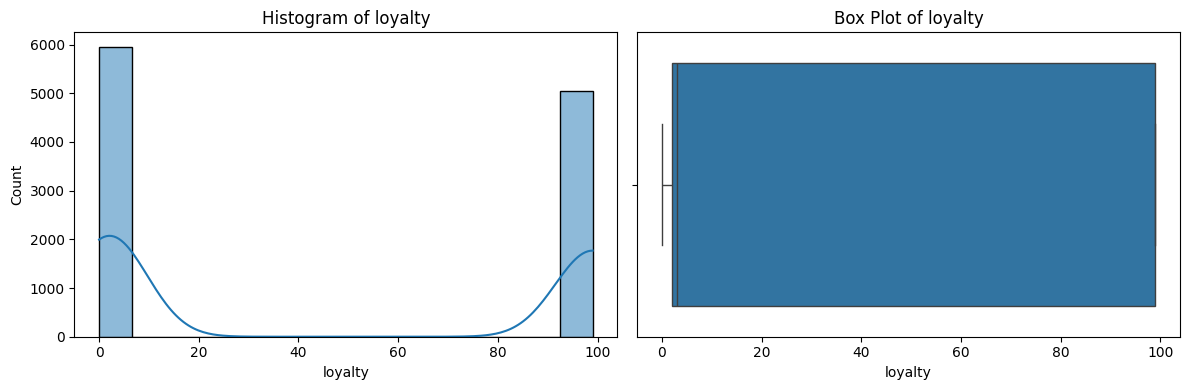

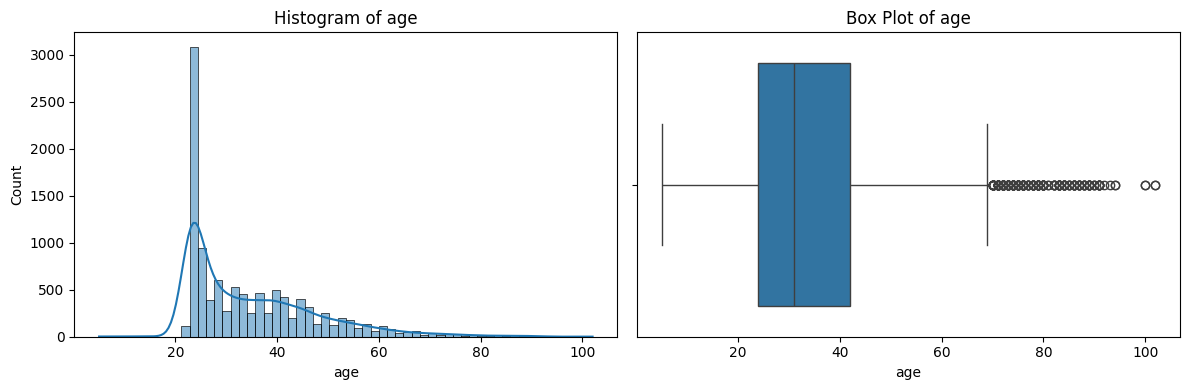

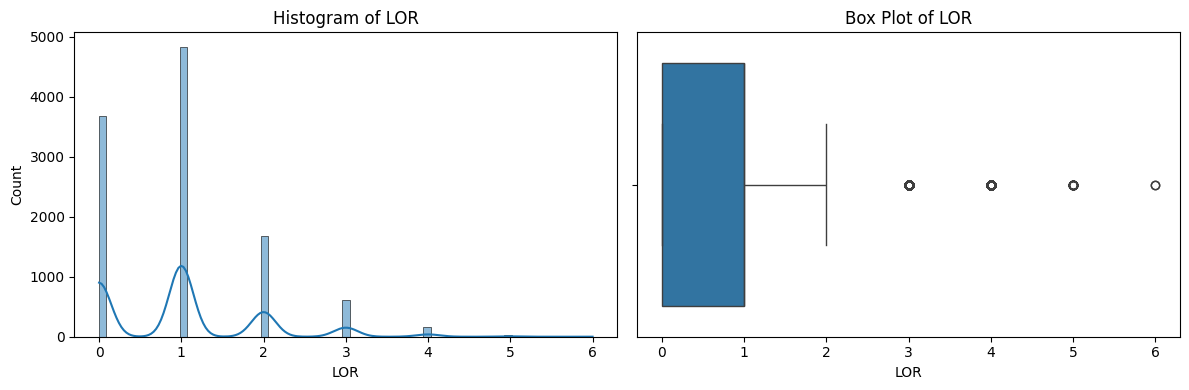

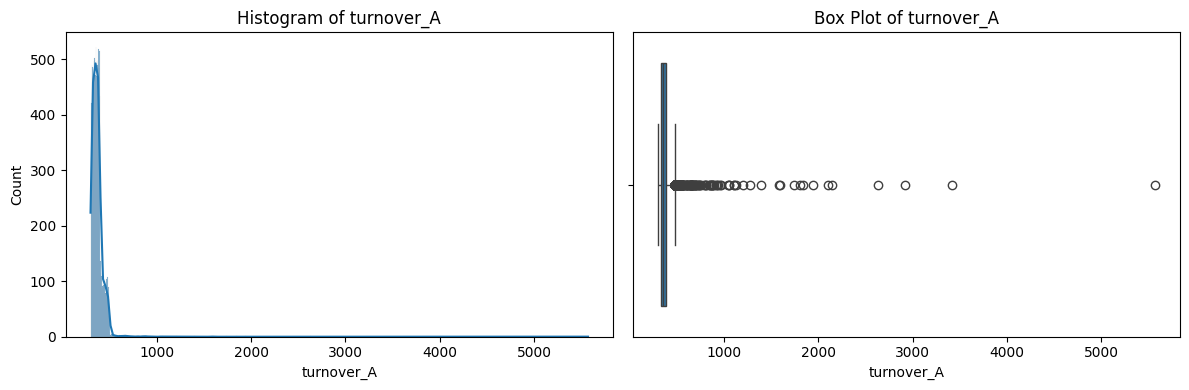

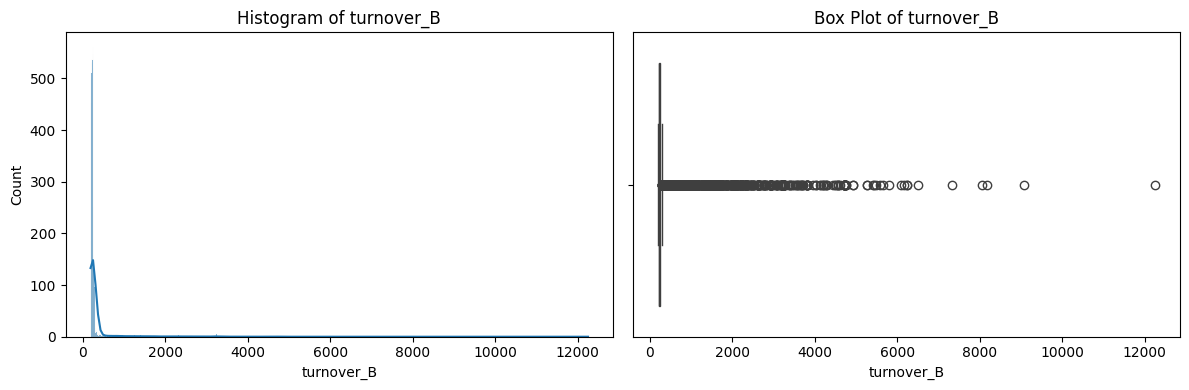

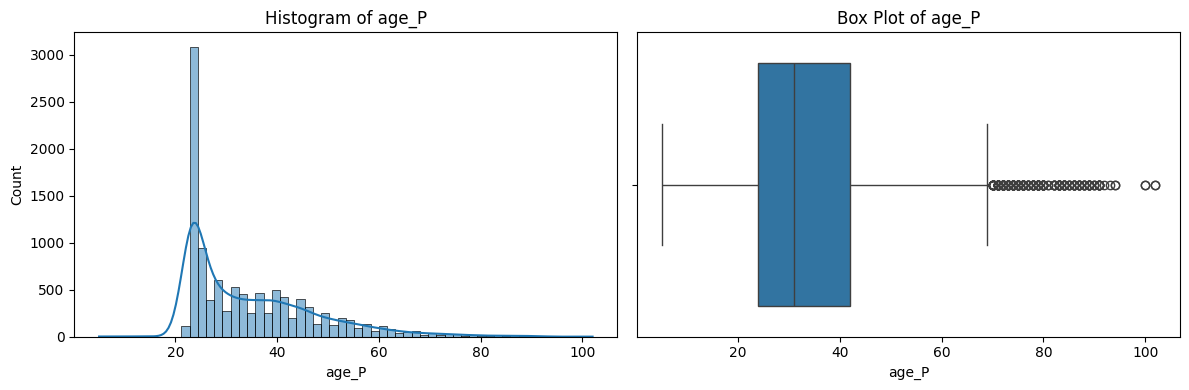

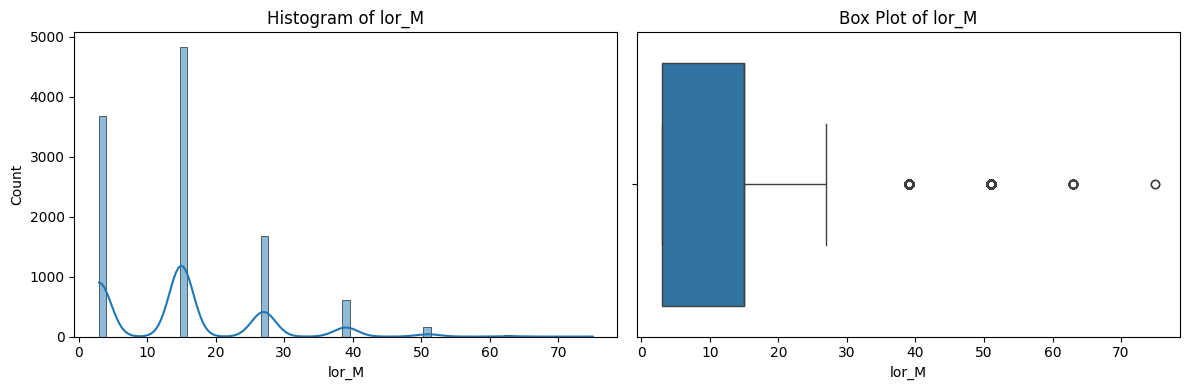

In [193]:
Hist_BoxPlotFunction(df, "Quant_plots.pdf")

In [194]:
#### Creating age bins

print("Age Min value: ",df['age'].min())
print("Age Max value: ",df['age'].max())

print("Age_P Min value: ",df['age_P'].min())
print("Age_P Max value: ",df['age_P'].max())


## Based on above min & max valuesm checking whether both columns has same values


print("No of rows having different values: " ,len(df[df['age'] != df['age_P']]))


### so we can drop one column, I am droping age_P column, considering age column is more valid at the time of insurance.

del df['age_P']

Age Min value:  5
Age Max value:  102
Age_P Min value:  5
Age_P Max value:  102
No of rows having different values:  0


In [195]:
######### Checking whether age & age_P columns are same

def age_bins_func(df, col):

    bins = [0, 20, 40, 60, 80, df[col].max()]
    labels = ['0-20', '21-40', '41-60', '61-80', '80+']

    df['age_bin'] = pd.cut(df['age'], bins, labels=labels)

    return df


df = age_bins_func(df, 'age')

df.head(2)

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,lor_M,age_bin
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,3,61-80
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,39,41-60


In [196]:
def plot_bar_chart(data: pd.DataFrame, column1: str, column2: str) -> None:

    # Make a copy of the data to avoid changing the original dataframe
    data_copy = data.copy()

    # Check if the columns are boolean, if so convert them to strings
    if data_copy[column1].dtype == 'bool':
        data_copy[column1] = data_copy[column1].astype(str)

    if data_copy[column2].dtype == 'bool':
        data_copy[column2] = data_copy[column2].astype(str)

    # Group the data by column1 and count unique values in column2
    grouped_data = data_copy.groupby(column1)[column2].nunique().reset_index()

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(grouped_data[column1], grouped_data[column2], color='skyblue')

    # Add value labels on top of the bars
    for bar, val in zip(bars, grouped_data[column2]):
        plt.text(bar.get_x() + bar.get_width() / 2, val + 0.1, val, ha='center')  # Adjust vertical offset with `+ 0.1`

    # Add labels and title
    plt.xlabel(column1)
    plt.ylabel(f'Unique count of {column2}')
    plt.title(f'Bar Chart of Unique Counts of {column2} by {column1}')

    # Rotate x-axis tick labels for readability
    plt.xticks(rotation=45, ha='right')

    # Adjust layout to prevent clipping of tick-labels
    plt.tight_layout()

    # Hide the plot
    plt.show()


In [197]:
def plot_bar_chart_3_columns(data: pd.DataFrame, product_col: str, target_col: str, id_col: str) -> None:

    # Make a copy of the data to avoid changing the original dataframe
    data_copy = data.copy()

    # Group data by product and target, then calculate the count of unique IDs
    grouped_data = (
        data_copy.groupby([product_col, target_col])[id_col].count().unstack().fillna(0)
    )

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = grouped_data.plot(kind="bar", colormap="tab20", ax=ax)


    # Add labels and title
    plt.xlabel(f"{product_col} and {target_col}")
    plt.ylabel("Count")
    plt.title(f"Count of unique combinations of {product_col} and {target_col}")

    # Rotate x-axis tick labels for readability (optional)
    # plt.xticks(rotation=45, ha='right')

    # Adjust layout to prevent overlapping labels (optional)
    plt.tight_layout()

    # Show the plot
    plt.show()


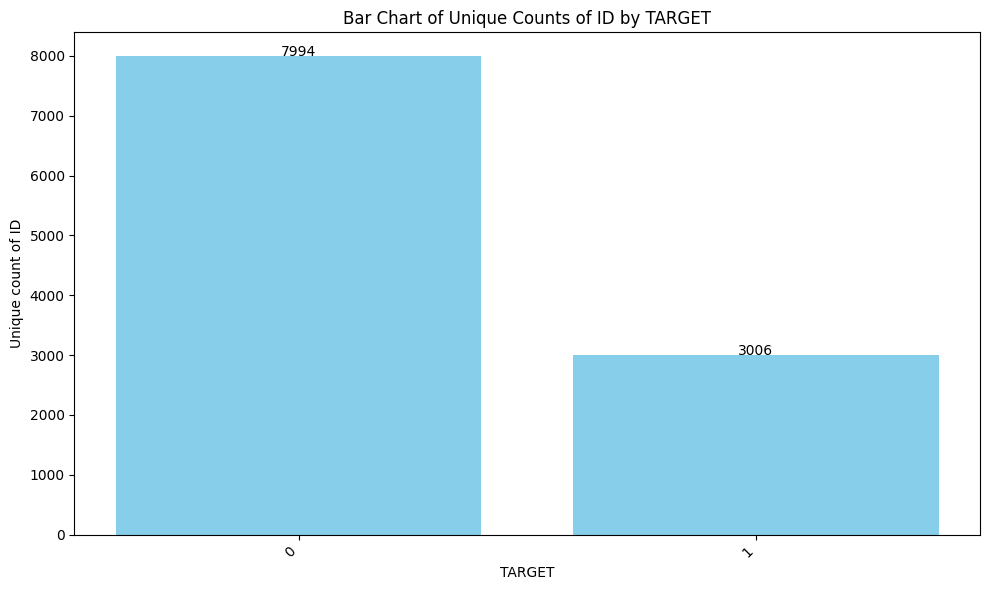

In [198]:
plot_bar_chart(df, 'TARGET','ID')

This shows the dataset is imbalanced dataset

# Age_bins

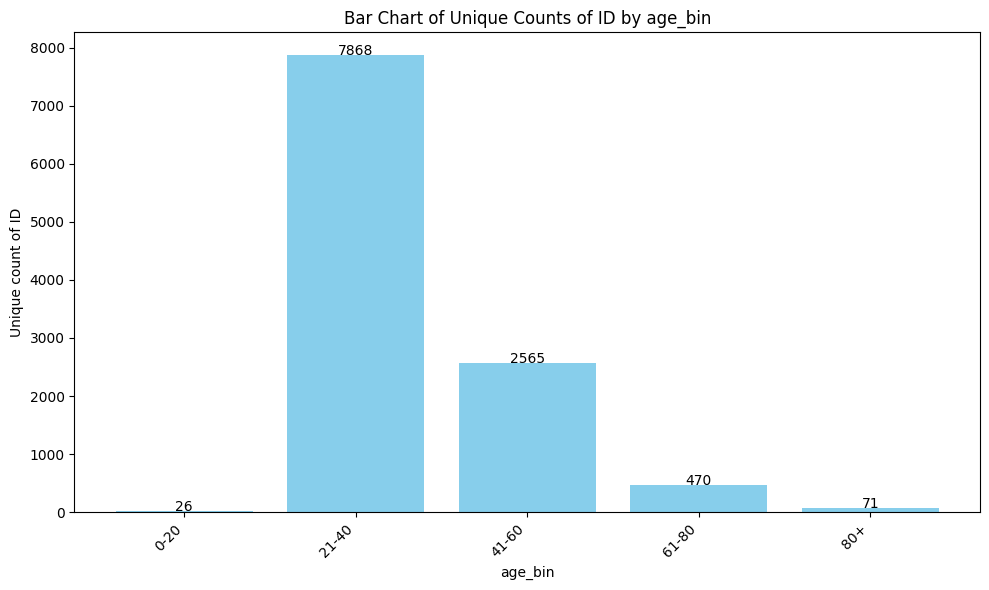

In [199]:
plot_bar_chart(df, 'age_bin','ID')

In [200]:
## want to check which age is been most repeated

df[df['age_bin'] == '21-40']['age'].value_counts()

23    2378
24     704
25     528
26     419
27     391
28     341
30     278
31     269
32     261
29     261
40     259
34     253
38     252
35     250
39     237
37     236
36     231
33     206
22     113
21       1
Name: age, dtype: int64

### so most of our customers are from young to middle age customers

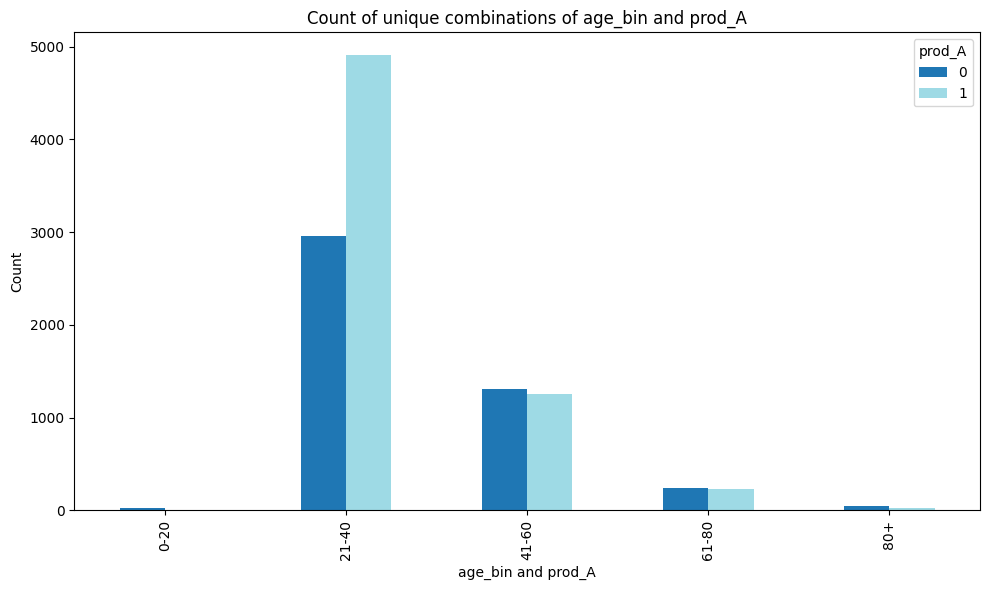

In [201]:
plot_bar_chart_3_columns(df, 'age_bin','prod_A','ID')

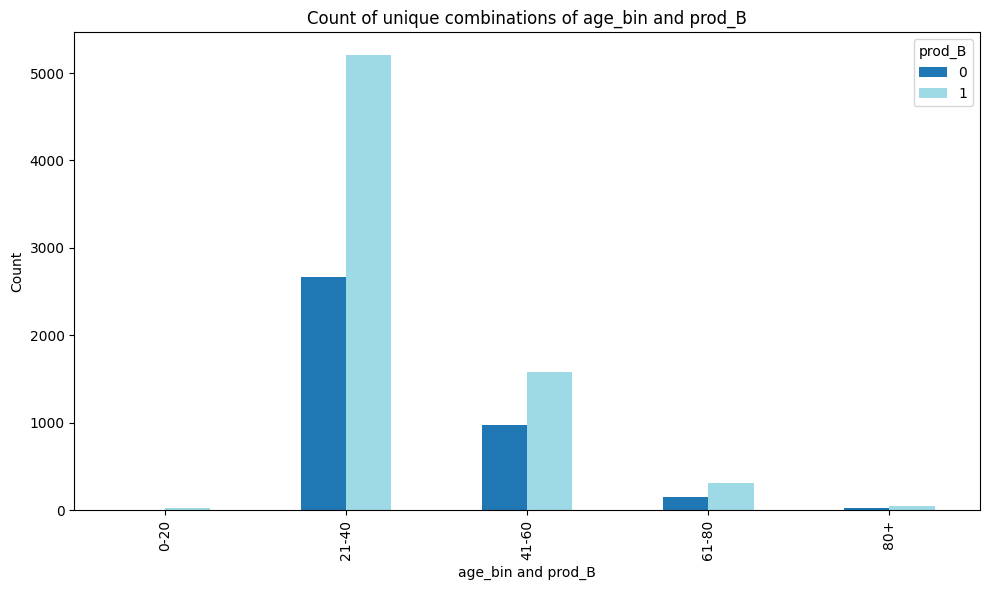

In [202]:
plot_bar_chart_3_columns(df, 'age_bin','prod_B','ID')

# loyalty

In [203]:
df['loyalty'].value_counts()

99    5045
3     2699
1     2016
2     1184
0       56
Name: loyalty, dtype: int64

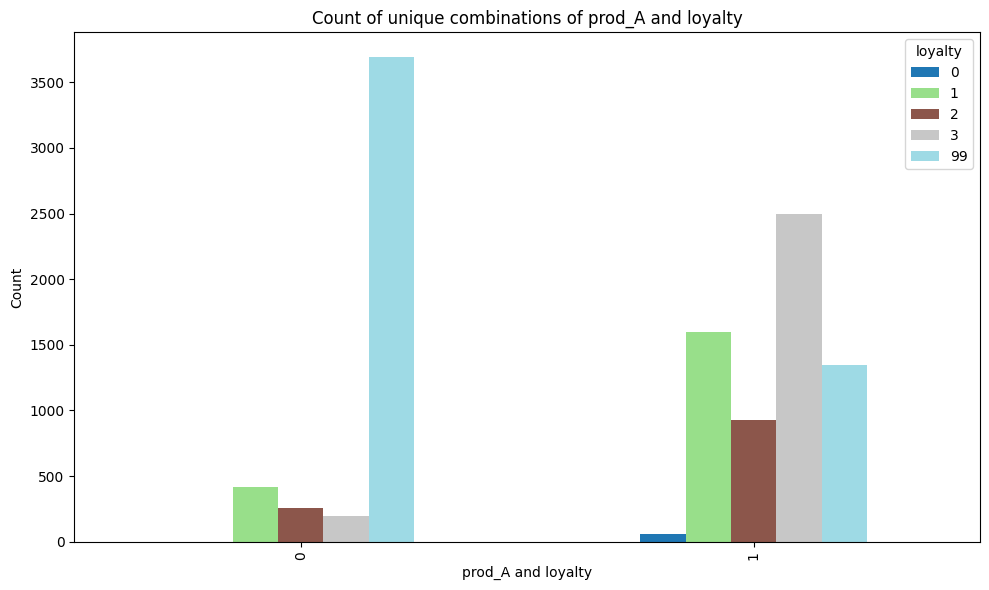

In [204]:
plot_bar_chart_3_columns(df, 'prod_A', 'loyalty', 'ID')

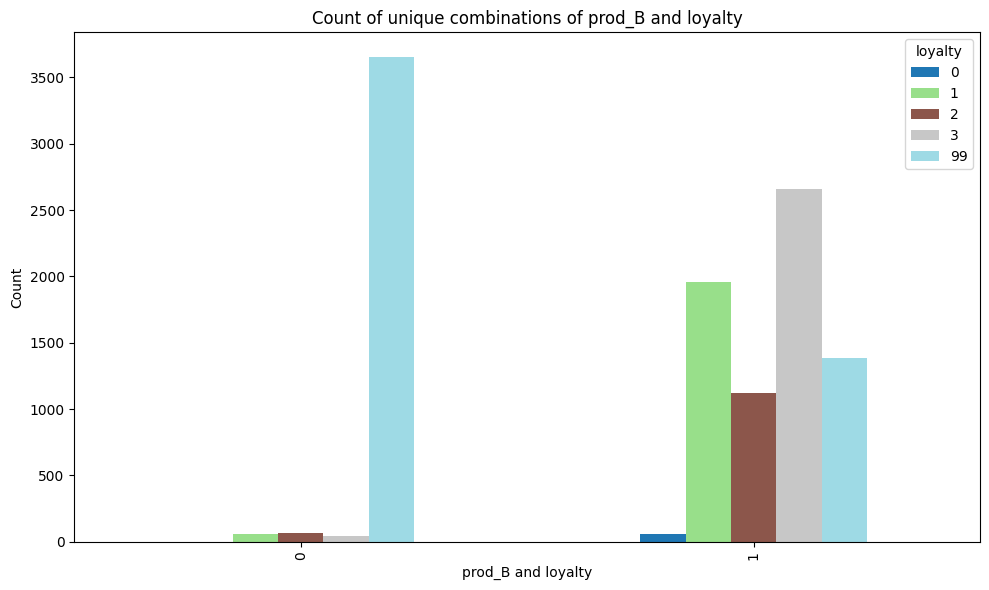

In [205]:
plot_bar_chart_3_columns(df, 'prod_B', 'loyalty', 'ID')

### Most of loyality unclassified (99) is given by non-purchased customers

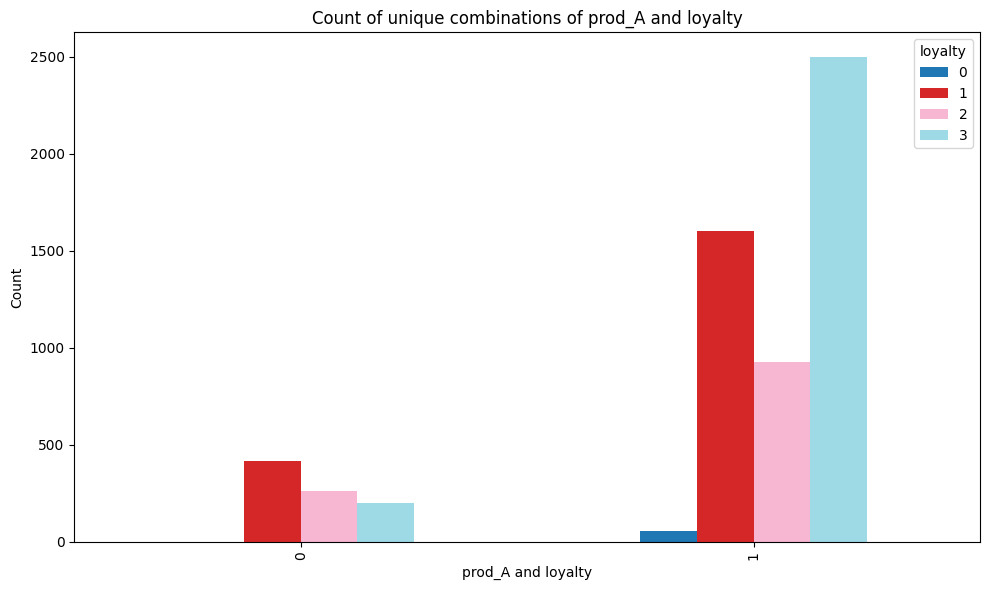

In [206]:
plot_bar_chart_3_columns(df[df['loyalty'] != 99], 'prod_A', 'loyalty', 'ID')

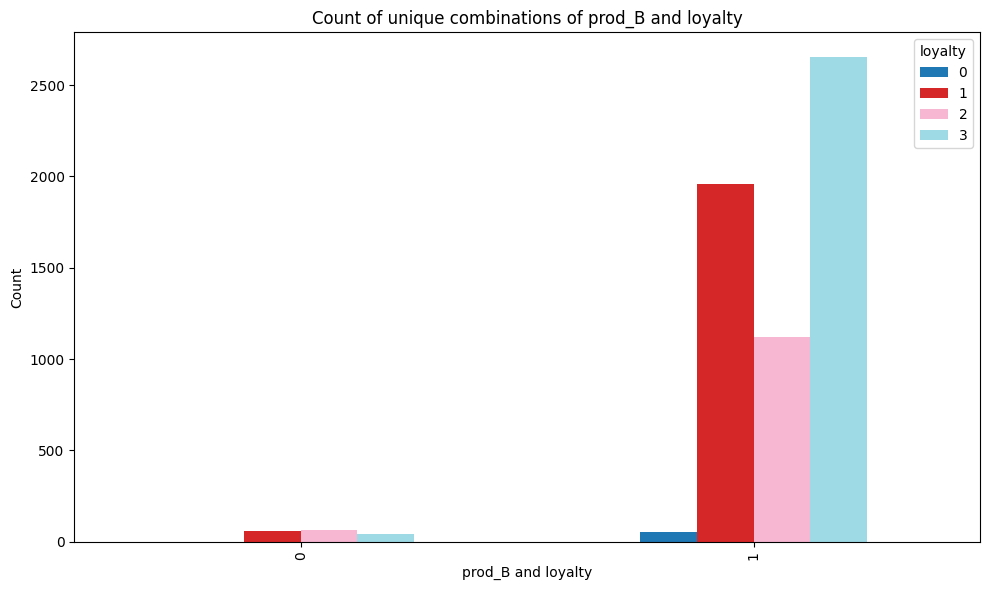

In [207]:
plot_bar_chart_3_columns(df[df['loyalty'] != 99], 'prod_B', 'loyalty', 'ID')

From the above product comparision, more customers have brought product B & having mostly same loyalty on purchased both products

# Product

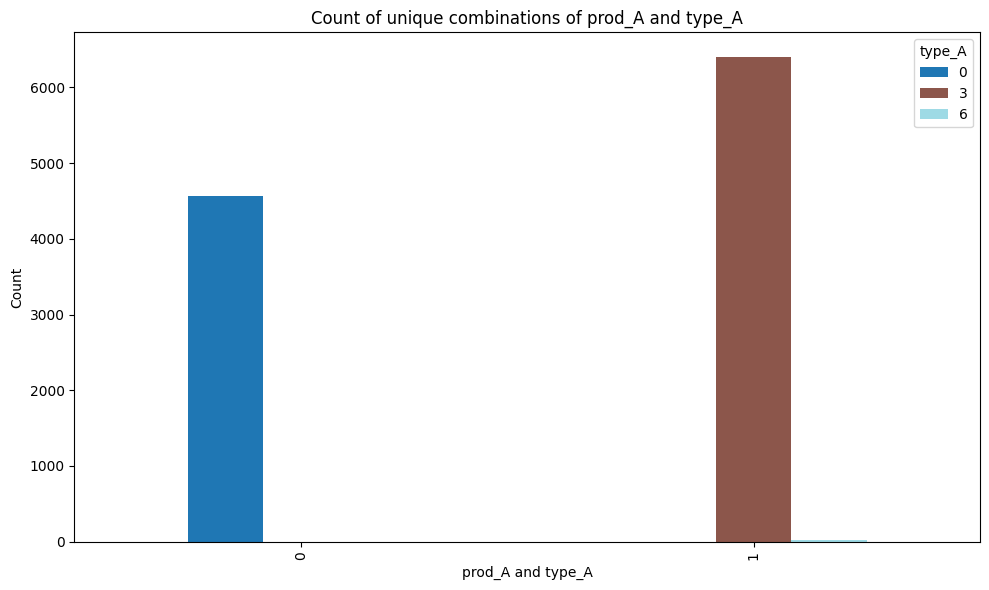

In [208]:
plot_bar_chart_3_columns(df, 'prod_A', 'type_A', 'ID')

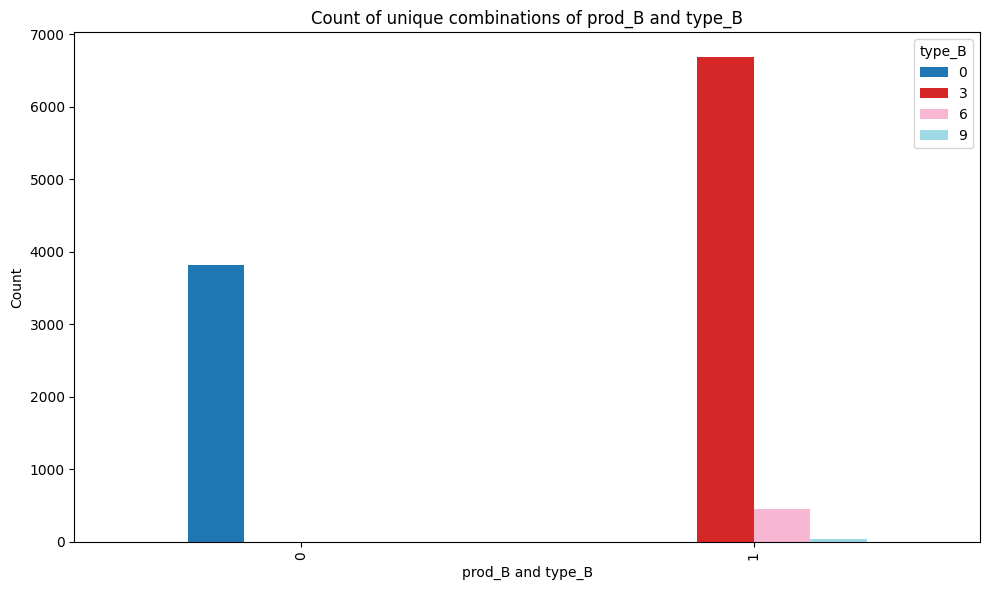

In [209]:
plot_bar_chart_3_columns(df, 'prod_B', 'type_B', 'ID')

Based on comparing the Product & its types, it clearly says in both products Type 0 is most unsold, & type 3 is most bought product type

# LOR_M

In [210]:
df.groupby(['prod_A','lor_M'])['ID'].nunique()

prod_A  lor_M
0       3        3685
        15        524
        27         95
        39        147
        51        101
        63         17
        75          1
1       15       4309
        27       1585
        39        470
        51         56
        63          9
        75          1
Name: ID, dtype: int64

In [211]:
df.groupby(['prod_B','lor_M'])['ID'].nunique()

prod_B  lor_M
0       3        3685
        15        132
        27          6
1       15       4701
        27       1674
        39        617
        51        157
        63         26
        75          2
Name: ID, dtype: int64

Clearly shows that lor_M 15 & 27 months are customers who bought more.

3 months LOR_M are not bought.

# Feature selection

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TARGET      11000 non-null  object  
 1   loyalty     11000 non-null  int64   
 2   ID          11000 non-null  object  
 3   age         11000 non-null  int64   
 4   city        11000 non-null  object  
 5   LOR         11000 non-null  int64   
 6   prod_A      11000 non-null  object  
 7   type_A      11000 non-null  object  
 8   type_B      11000 non-null  object  
 9   prod_B      11000 non-null  object  
 10  turnover_A  11000 non-null  float64 
 11  turnover_B  11000 non-null  float64 
 12  contract    11000 non-null  object  
 13  lor_M       11000 non-null  int64   
 14  age_bin     11000 non-null  category
dtypes: category(1), float64(2), int64(4), object(8)
memory usage: 1.2+ MB


In [213]:
### copy the dataframe

df_copy = df.copy(deep=True)
del df_copy['age_bin']
del df_copy['contract']

In [214]:
df_copy['TARGET'] = df_copy['TARGET'].astype(int)
df_copy['loyalty'] = df_copy['loyalty'].astype(int)
df_copy['ID'] = df_copy['ID'].astype(int)
df_copy['age'] = df_copy['age'].astype(int)
df_copy['city'] = df_copy['city'].astype(int)
df_copy['LOR'] = df_copy['LOR'].astype(int)
df_copy['prod_A'] = df_copy['prod_A'].astype(int)
df_copy['prod_B'] = df_copy['prod_B'].astype(int)
df_copy['type_A'] = df_copy['type_A'].astype(int)
df_copy['type_B'] = df_copy['type_B'].astype(int)
df_copy['turnover_A'] = df_copy['turnover_A'].astype(int)
df_copy['turnover_B'] = df_copy['turnover_B'].astype(int)
df_copy['lor_M'] = df_copy['lor_M'].astype(int)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   TARGET      11000 non-null  int64
 1   loyalty     11000 non-null  int64
 2   ID          11000 non-null  int64
 3   age         11000 non-null  int64
 4   city        11000 non-null  int64
 5   LOR         11000 non-null  int64
 6   prod_A      11000 non-null  int64
 7   type_A      11000 non-null  int64
 8   type_B      11000 non-null  int64
 9   prod_B      11000 non-null  int64
 10  turnover_A  11000 non-null  int64
 11  turnover_B  11000 non-null  int64
 12  lor_M       11000 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB


<Axes: >

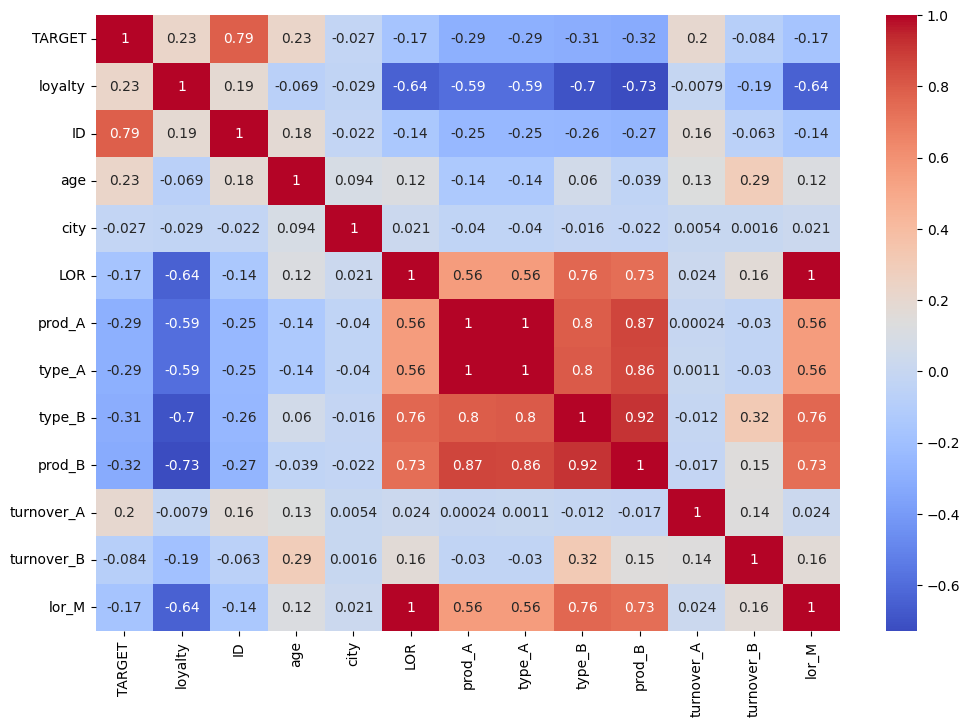

In [215]:
### Correlation Plot

cm = df_copy.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm')

Based on the correlation matrix and considering the above EDA, planning to use

**Model 1: Demographic and Customer Relationship Features**

Age: Customer's age might affect the likelihood of purchasing additional
products.

LOR (Length of Relationship): The length of time the customer has been with the company could impact their loyalty and their openness to purchasing additional products.

Loyalty: A loyalty score that might directly relate to the likelihood of purchasing more products.

Model 2: Current Product Engagement Features
**bold text**

Prod_A (Whether they bought Product A): This could indicate a willingness to purchase additional products.

Turnover_A (Amount spent on Product A): The amount spent might show the level of engagement with the company's products.

Prod_B and Turnover_B: Similar to Product A, these variables could indicate a willingness to purchase additional products and the level of engagement with the current products.

**Model 3: Combined Features**

A combination of demographic and product engagement features, for instance:

Age

Loyalty

Prod_A or Prod_B (choosing one to avoid multicollinearity with Turnover)
Turnover_A or Turnover_B (as an indicator of monetary engagement with the products)

# **Prepped Data Review**


In [216]:
df_copy.describe()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,0.273273,46.539636,27016.529455,34.845000,2.602273,0.983091,0.584545,1.759909,2.098636,0.652455,371.828545,343.705455,14.797091
std,0.445660,48.292767,38568.720172,13.035625,8.687307,0.939523,0.492823,1.490062,1.671384,0.476212,96.709356,524.558519,11.274276
min,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,191.000000,3.000000
25%,0.000000,2.000000,5476.750000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,332.000000,218.000000,3.000000
50%,0.000000,3.000000,11025.500000,31.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,361.000000,235.000000,15.000000
75%,1.000000,99.000000,16632.250000,42.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,391.000000,253.000000,15.000000
max,1.000000,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.000000,12249.000000,75.000000


Comparing the previous data we have removed the city (-9999) data and we have used age-bins for EDA and removed it before modelling, we have removed contract column as it has only 1 value before modelling

# **Modelling**

In [217]:
df_copy['TARGET'].value_counts()

0    7994
1    3006
Name: TARGET, dtype: int64

As our dataset is imbalanced we are using a concept of weighted class in fitting the model.

In [218]:
# Adjusting the run_logistic_regression function to handle class imbalance by adding class_weight='balanced'

def run_logistic_regression_balanced(df ,features, target='TARGET'):
    # 1. Train Test split
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

    # 2. Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Fit the model with class_weight='balanced'
    model = LogisticRegression(random_state=42, class_weight='balanced')
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # 4. Return the metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    }

    return metrics



In [219]:
df_copy.head(2)

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,1,99,77,66,2,0,0,0,0,0,333,264,3
1,1,1,159,45,2,3,1,3,3,1,394,284,39


In [220]:
# Define a function that compares the three models with balanced class weights and picks the best one based on a given metric
def compare_models_balanced(df, metric='roc_auc'):

  features_set_1 = ['age','loyalty', 'lor_M']
  features_set_2 = ['prod_A','prod_B', 'turnover_A','turnover_B']
  features_set_3 = ['prod_A','prod_B', 'age','loyalty']


  metrics_1 = run_logistic_regression_balanced(df, features_set_1)
  metrics_2 = run_logistic_regression_balanced(df,features_set_2)
  metrics_3 = run_logistic_regression_balanced(df,features_set_3)

  print("Model 1\t")
  print("Features: ",features_set_1)
  print("Metrics: ",metrics_1[metric])

  print("Model 2\t")
  print("Features: ",features_set_2)
  print("Metrics: ",metrics_2[metric])

  print("Model 3\t")
  print("Features: ",features_set_3)
  print("Metrics: ",metrics_3[metric])


  # Compare the models based on the specified metric
  best_metrics = max(metrics_1[metric], metrics_2[metric], metrics_3[metric])

  if best_metrics == metrics_1[metric]:
      best_model = 'Model 1'
      best_features = features_set_1
  elif best_metrics == metrics_2[metric]:
      best_model = 'Model 2'
      best_features = features_set_2
  else:
      best_model = 'Model 3'
      best_features = features_set_3


  print("\nBest Model \t")
  print(best_model)
  print("Features: ",best_features)
  print("Metrics: ",best_metrics)


  return best_model, best_features, best_metrics


# **Model Selection**

In [221]:

# Run the comparison of models with balanced class weights
best_model_balanced, best_features_balanced, best_metrics_balanced = compare_models_balanced(df_copy)

Model 1	
Features:  ['age', 'loyalty', 'lor_M']
Metrics:  0.7310763888888889
Model 2	
Features:  ['prod_A', 'prod_B', 'turnover_A', 'turnover_B']
Metrics:  0.8091956018518519
Model 3	
Features:  ['prod_A', 'prod_B', 'age', 'loyalty']
Metrics:  0.7605960648148149

Best Model 	
Model 2
Features:  ['prod_A', 'prod_B', 'turnover_A', 'turnover_B']
Metrics:  0.8091956018518519


# Conclusion

In conclusion, we have successfully prepared a model for the data science assignment. We started by cleaning the data and removing duplicates, followed by performing exploratory data analysis (EDA) and feature selection. We built three logistic regression models, each focusing on different sets of categories: demographic, product purchase, and a combination of both. After comparing the metrics of the three models using the ROC-AUC metric, we selected the best model, which is model 2. This model showed the highest performance based on our evaluation criteria.